In [0]:
import json
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

dir = '/content/drive/My Drive/College Stuff/Precision Care Medicine/Code and Stuff/Time-series/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
with open(dir + 'HR_clean.json', 'r') as json_file:
  data = json.load(json_file)

In [0]:
e = pd.read_csv('/content/drive/My Drive/Colab Notebooks/events_train.csv')

In [0]:
p = np.asarray(e['position'])
n = np.asarray(e['name'])
posp = []
namep = []
posn = []
namen = []
posp_list = []
posn_list = []

In [0]:
for j in range(len(p)):
  if type(p[j]) == float and len(posn) < 4000:
    namen.append(n[j])
    posn.append(200)

In [0]:
for j in range(len(p)):
  if type(p[j]) == str and len(posp) < 4000:
    namep.append(n[j])
    k = 1
    string = ''
    while p[j][k] != ",":
      string = string + p[j][k]
      k += 1
    posp.append(int(string))

In [0]:
for a in range(len(posp)):
  posp_list.append(data[namep[a]][posp[a]-150:posp[a]])

In [0]:
p_means = []
p_sem = []
p_std = []
for thing in range(150):
  hold = []
  for thing2 in range(len(posp_list)):
    if (len(posp_list[thing2]) > thing):
      if (posp_list[thing2][thing] < 200):
        hold.append(posp_list[thing2][thing])
  p_means.append(np.mean(np.asarray(hold)))
  p_sem.append(stats.sem(np.asarray(hold)))
  p_std.append(np.std(np.asarray(hold)))

In [0]:
for b in range(len(posn)):
  posn_list.append(data[namen[b]][posn[b]-150:posn[b]])

In [0]:
n_means = []
n_sem = []
n_std = []
for thing in range(150):
  hold = []
  for thing2 in range(len(posn_list)):
    if (len(posn_list[thing2]) > thing):
      if (posn_list[thing2][thing] < 200):
        hold.append(posn_list[thing2][thing])
  n_means.append(np.mean(np.asarray(hold)))
  n_sem.append(stats.sem(np.asarray(hold)))
  n_std.append(np.std(np.asarray(hold)))

In [0]:
n_means = np.asarray(n_means)
n_std = np.asarray(n_std)
p_means = np.asarray(p_means)
p_std = np.asarray(p_std)

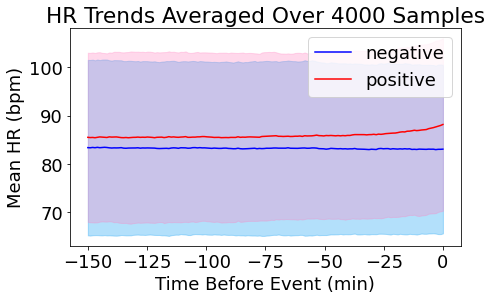

In [13]:
x = np.linspace(-150,0,150)
plt.figure(figsize=(7,4))
plt.rcParams.update({'font.size': 18})
plt.plot(x, n_means, color = 'blue')
plt.fill_between(x, n_means+n_std, n_means-n_std, color='xkcd:azure', alpha = 0.3)
plt.plot(x, p_means, color = 'red')
plt.fill_between(x, p_means+p_std, p_means-p_std, color='xkcd:pink', alpha = 0.3)
plt.ylabel('Mean HR (bpm)')
plt.xlabel('Time Before Event (min)')
plt.title('HR Trends Averaged Over 4000 Samples')
plt.legend(['negative', 'positive'])
plt.savefig('drive/My Drive/College Stuff/HRTrend2.png')